In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option("display.max_columns", 999)

In [10]:
df = pd.read_csv("db_scrap.csv", sep=";")
df.drop(columns="Unnamed: 0", inplace=True)
df.drop_duplicates(subset=['id_offer'], inplace=True)

In [3]:
len(df)

437

In [4]:
df.tail()

,title,piece,chambre,surface,etage,terrain,nb_photos,price,location_est,desc,dt_construction,dt_dispo,prevoir_travaux,refait_neuf,ascenseur,terrasse,calme,belle_vue,parking,cuisine,sdb,sde,toilettes,toilettes_sep,sej_sal,cave,gardien,digicode,interphone,entree_sep,expo,balcon,handic,box,plc_rg,cheminee,piscine,alarme,parquet,sans_vav,sam,typ_chauff,dpe,ges,l_col,r_col,id_offer
1603,Achat appartement,2 pièces,2 chambres,40 m²,Étage 3/3,NaN,23 Photos,365 000 €,Quartier Centre Ville-Vieux Puteaux à Puteaux ...,Théâtre de Puteaux . \n--\n2 studios de 20 m² ...,Construit en 1930,NaN,NaN,NaN,Pas d'ascenseur,NaN,NaN,NaN,NaN,Cuisine équipée,Salle de bain (baignoire),2 salles d'eau (douche),2 toilettes,NaN,NaN,Cave,NaN,Digicode,NaN,NaN,Exposition Sud/Ouest,NaN,NaN,NaN,Placards / rangements,NaN,NaN,NaN,NaN,NaN,NaN,Chauffage individuel au gaz : radiateur,Diagnostic de performance énergétique (DPE)DPE...,Indice d'émission de gaz à effet de serre (GES...,NaN,NaN,183451741
1605,Achat appartement,3 pièces,2 chambres,"64,3 m²",Étage 1/2,NaN,10 Photos,450 000 €,à La Garenne-Colombes (92250),"Vous souhaitez vivre en plein centre ville, ru...",Construit en 1930,NaN,NaN,NaN,Pas d'ascenseur,NaN,NaN,NaN,NaN,Aucune cuisine,NaN,Salle d'eau (douche),Toilettes,NaN,Séjour / salon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chauffage individuel au gaz,Diagnostic de performance énergétique (DPE)D,Indice d'émission de gaz à effet de serre (GES)D,NaN,NaN,184032697
1634,Achat appartement,5 pièces,3 chambres,107 m²,Étage 0/0,NaN,10 Photos,840 000 €,à Asnières-sur-Seine (92600),"A proximité de la gare d'Asnières-sur-Seine, C...",NaN,NaN,NaN,NaN,Ascenseur,NaN,NaN,NaN,NaN,Cuisine équipée,Salle de bain (baignoire),Salle d'eau (douche),2 toilettes,NaN,Séjour / salon 40 m²,Cave,NaN,Digicode,Interphone,NaN,NaN,NaN,NaN,NaN,Placards / rangements,NaN,NaN,NaN,NaN,NaN,NaN,Chauffage individuel au gaz,Diagnostic de performance énergétique (DPE)Non...,Indice d'émission de gaz à effet de serre (GES...,NaN,NaN,184061631
1642,Achat maison 1 étage,6 pièces,4 chambres,Terrain 240 m²,NaN,NaN,13 Photos,890 000 €,Quartier Gabriel Péri-Estienne d'Orves à Colom...,COLOMBES LA PETITE GARENNE: Maison de 143m² au...,Construite en 1930,NaN,NaN,NaN,NaN,NaN,Calme,NaN,Parking,Cuisine équipée,Salle de bain (baignoire),Salle d'eau (douche),3 toilettes,NaN,NaN,Cave 5 m²,NaN,NaN,NaN,Entrée séparée,Exposition Nord/Sud,NaN,NaN,NaN,Placards / rangements,NaN,NaN,Alarme,NaN,NaN,Salle à manger,Chauffage individuel au gaz : radiateur,Diagnostic de performance énergétique (DPE)Non...,Indice d'émission de gaz à effet de serre (GES...,NaN,NaN,178981719
1646,Achat appartement,3 pièces,2 chambres,67 m²,Étage 4/6,NaN,18 Photos,750 000 €,Quartier Trezel à Levallois-Perret (92300),Collange\n--\n Appartement 3P de 67 m² carrez ...,Construit en 2014,NaN,NaN,NaN,Ascenseur,Terrasse,Calme,Belle vue,NaN,Cuisine américaine équipée,NaN,Salle d'eau (douche),Toilettes,NaN,"Séjour / salon 29,12 m²",Cave 5 m²,NaN,Digicode,NaN,Entrée séparée,Exposition Ouest,Balcon,NaN,NaN,Placards / rangements,NaN,NaN,NaN,Parquet,NaN,NaN,Chauffage collectif,Diagnostic de performance énergétique (DPE)C,Indice d'émission de gaz à effet de serre (GES)A,NaN,NaN,183339765


In [5]:
df['price'].value_counts()

675 000 €      5
549 000 €      4
475 000 €      4
895 000 €      4
399 000 €      4
              ..
234 960 €      1
342 875 €      1
1 099 000 €    1
997 500 €      1
141 000 €      1
Name: price, Length: 326, dtype: int64

In [5]:
# Data cleansing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 1646
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            437 non-null    object 
 1   piece            433 non-null    object 
 2   chambre          414 non-null    object 
 3   surface          437 non-null    object 
 4   etage            369 non-null    object 
 5   terrain          0 non-null      float64
 6   nb_photos        437 non-null    object 
 7   price            437 non-null    object 
 8   location_est     437 non-null    object 
 9   desc             437 non-null    object 
 10  dt_construction  330 non-null    object 
 11  dt_dispo         4 non-null      object 
 12  prevoir_travaux  24 non-null     object 
 13  refait_neuf      38 non-null     object 
 14  ascenseur        369 non-null    object 
 15  terrasse         102 non-null    object 
 16  calme            176 non-null    object 
 17  belle_vue      

In [7]:
def get_construction_date(x):
    if pd.isna(x) == True:
        x = 0
    if x == 0 or x== 0.0:
        pass
    else:  
        x = x.replace('Construit en ', '').replace('Construite en ', '')

        if len(x) == 2:
            x = f"19{x}"
    return x

def get_bedrooom_nb(x):
    if pd.isna(x) == True:
        x = 0
    if x == 0:
        x = 0
    else:  
        x = x.replace(' chambres', '').replace(' chambre', '')
        x = pd.to_numeric(x)
    return x

def get_sqrm(x):
    x_test = x
    #print(x_test)
    if pd.isna(x) == True:
        x = 0
    if x == 0:
        x = 0
    else:  
        if x == 'Terrain – m²':
            x = 0
        elif x.startswith('Terrain'):
            x = 0
        elif x == "– m²":
            x = 0
        else:
            x = x.replace('Terrain – ', '').replace('-', '').replace(' m²', '').replace(',', '.')
            if len(x) == 0:
                x = 0
            x = pd.to_numeric(x)
        #print(f"{x_test} - {x}")
    return x

def get_parquet(x):
    if pd.isna(x) == True:
        x = 0
    if x == 0:
        x = 0
    else:
        x = x.replace('Parquet', '1')
        x = pd.to_numeric(x)
    return x

def get_alarme(x):
    if pd.isna(x) == True:
        x = 0
    if x == 0:
        x = 0
    else:
        x = x.replace('Alarme', '1')
        x = pd.to_numeric(x)
    return x

def get_piece(x):
    if pd.isna(x) == True:
        x = 0
    if x == 0:
        x = 0
    else:
        x = x.replace('pièces', '').replace('pièce', '')
        x = pd.to_numeric(x)
    return x

In [11]:
df['surface'] = df['surface'].apply(lambda x : get_sqrm(x))
df['dt_construction'] = df['dt_construction'].apply(lambda x : get_construction_date(x))
df['chambre'] = df['chambre'].apply(lambda x : get_bedrooom_nb(x))
df['parquet'] = df['parquet'].apply(lambda x : get_parquet(x))
df['alarme'] = df['alarme'].apply(lambda x : get_alarme(x))
df['piece'] = df['piece'].apply(lambda x : get_piece(x))

In [12]:
df['price'] = df['price'].apply(lambda x : str(x).replace('€', '').replace(' ', ''))
df['price'] = pd.to_numeric(df['price'])

#df['nb_photos'] = df['nb_photos'].apply(lambda x : x.replace('Photos', '').replace('Photo', ''))
#df['nb_photos'] = pd.to_numeric(df['nb_photos'])


df['surface_group'] = pd.cut(df.surface, range(0, 100, 20))
df['neighborhood'] = df['location_est'].apply(lambda x : x.split('à')[0])
df['postal_code'] = df['location_est'].apply(lambda x : x.split('à')[1].split('(')[1].replace(')', ''))
df['city'] = df['location_est'].apply(lambda x : x.split('à')[1].split('(')[0].lstrip(' ').rstrip(' '))



#df['chambre'].fillna(0)
#df['chambre'] = df['chambre'].apply(lambda x : get_bedrooom_nb(x))


In [9]:


#df['etage'] = df['etage'].apply(lambda x : x.replace('Étage ', ''))

#for col in ['dt_construction', 'dt_dispo', 'prevoir_travaux', 'refait_neuf', 'ascenseur', 'terrasse', 'calme', 'belle_vue', 'parking',
#'cuisine', 'sdb', 'sde', 'toilettes', 'toilettes_sep', 'sej_sal', 'cave', 'gardien', 'digicode', 'interphone', 'entree_sep', 'expo',
#'balcon', 'handic', 'box', 'plc_rg', 'cheminee', 'piscine', 'alarme', 'parquet', 'sans_vav', 'sam', 'typ_chauff', 'dpe',
#'ges', 'l_col', 'r_col', 'id_offer']:
#    df[col] = df[col].fillna(0)







In [13]:
df['neighborhood'].value_counts()

                               141
Quartier Bécon                  34
Quartier Hôtel de Ville         25
Quartier Gambetta               22
Quartier Centre Ville           21
                              ... 
Quartier Villiers-Cerdan         1
Quartier Centre-Mairie           1
Quartier Chefson-de Gaulle       1
Quartier Chateau Ridel           1
Quartier Villiers-Danton         1
Name: neighborhood, Length: 84, dtype: int64

In [14]:
df.tail()

,title,piece,chambre,surface,etage,terrain,nb_photos,price,location_est,desc,dt_construction,dt_dispo,prevoir_travaux,refait_neuf,ascenseur,terrasse,calme,belle_vue,parking,cuisine,sdb,sde,toilettes,toilettes_sep,sej_sal,cave,gardien,digicode,interphone,entree_sep,expo,balcon,handic,box,plc_rg,cheminee,piscine,alarme,parquet,sans_vav,sam,typ_chauff,dpe,ges,l_col,r_col,id_offer,surface_group,neighborhood,postal_code,city
1603,Achat appartement,2,2,40.0,Étage 3/3,NaN,23 Photos,365000,Quartier Centre Ville-Vieux Puteaux à Puteaux ...,Théâtre de Puteaux . \r--\r2 studios de 20 m² ...,1930,NaN,NaN,NaN,Pas d'ascenseur,NaN,NaN,NaN,NaN,Cuisine équipée,Salle de bain (baignoire),2 salles d'eau (douche),2 toilettes,NaN,NaN,Cave,NaN,Digicode,NaN,NaN,Exposition Sud/Ouest,NaN,NaN,NaN,Placards / rangements,NaN,NaN,0,0,NaN,NaN,Chauffage individuel au gaz : radiateur,Diagnostic de performance énergétique (DPE)DPE...,Indice d'émission de gaz à effet de serre (GES...,NaN,NaN,183451741,"(20.0, 40.0]",Quartier Centre Ville-Vieux Puteaux,92800,Puteaux
1605,Achat appartement,3,2,64.3,Étage 1/2,NaN,10 Photos,450000,à La Garenne-Colombes (92250),"Vous souhaitez vivre en plein centre ville, ru...",1930,NaN,NaN,NaN,Pas d'ascenseur,NaN,NaN,NaN,NaN,Aucune cuisine,NaN,Salle d'eau (douche),Toilettes,NaN,Séjour / salon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Chauffage individuel au gaz,Diagnostic de performance énergétique (DPE)D,Indice d'émission de gaz à effet de serre (GES)D,NaN,NaN,184032697,"(60.0, 80.0]",,92250,La Garenne-Colombes
1634,Achat appartement,5,3,107.0,Étage 0/0,NaN,10 Photos,840000,à Asnières-sur-Seine (92600),"A proximité de la gare d'Asnières-sur-Seine, C...",0,NaN,NaN,NaN,Ascenseur,NaN,NaN,NaN,NaN,Cuisine équipée,Salle de bain (baignoire),Salle d'eau (douche),2 toilettes,NaN,Séjour / salon 40 m²,Cave,NaN,Digicode,Interphone,NaN,NaN,NaN,NaN,NaN,Placards / rangements,NaN,NaN,0,0,NaN,NaN,Chauffage individuel au gaz,Diagnostic de performance énergétique (DPE)Non...,Indice d'émission de gaz à effet de serre (GES...,NaN,NaN,184061631,NaN,,92600,Asnières-sur-Seine
1642,Achat maison 1 étage,6,4,0.0,NaN,NaN,13 Photos,890000,Quartier Gabriel Péri-Estienne d'Orves à Colom...,COLOMBES LA PETITE GARENNE: Maison de 143m² au...,1930,NaN,NaN,NaN,NaN,NaN,Calme,NaN,Parking,Cuisine équipée,Salle de bain (baignoire),Salle d'eau (douche),3 toilettes,NaN,NaN,Cave 5 m²,NaN,NaN,NaN,Entrée séparée,Exposition Nord/Sud,NaN,NaN,NaN,Placards / rangements,NaN,NaN,1,0,NaN,Salle à manger,Chauffage individuel au gaz : radiateur,Diagnostic de performance énergétique (DPE)Non...,Indice d'émission de gaz à effet de serre (GES...,NaN,NaN,178981719,NaN,Quartier Gabriel Péri-Estienne d'Orves,92700,Colombes
1646,Achat appartement,3,2,67.0,Étage 4/6,NaN,18 Photos,750000,Quartier Trezel à Levallois-Perret (92300),Collange\r--\r Appartement 3P de 67 m² carrez ...,2014,NaN,NaN,NaN,Ascenseur,Terrasse,Calme,Belle vue,NaN,Cuisine américaine équipée,NaN,Salle d'eau (douche),Toilettes,NaN,"Séjour / salon 29,12 m²",Cave 5 m²,NaN,Digicode,NaN,Entrée séparée,Exposition Ouest,Balcon,NaN,NaN,Placards / rangements,NaN,NaN,0,1,NaN,NaN,Chauffage collectif,Diagnostic de performance énergétique (DPE)C,Indice d'émission de gaz à effet de serre (GES)A,NaN,NaN,183339765,"(60.0, 80.0]",Quartier Trezel,92300,Levallois-Perret


In [15]:
df['city'].value_counts()

Courbevoie             157
Nantes                 102
Angers                  41
Asnières-sur-Seine      25
Toulouse                21
Levallois-Perret        17
Neuilly-sur-Seine       17
Puteaux                 12
Colombes                12
Le Mans                 10
Bois-Colombes            8
La Garenne-Colombes      8
Suresnes                 7
Name: city, dtype: int64

In [30]:
df['title'].value_counts()

Achat appartement           310
Achat duplex                 35
Achat studio                 16
Achat appartement meublé      3
Achat studio meublé           2
Achat immeuble                1
Achat loft/atelier            1
Achat studette                1
Name: title, dtype: int64

In [16]:
df['surface'].value_counts()

0.00      66
70.00     10
90.00      7
69.00      7
67.00      6
          ..
92.50      1
87.82      1
50.15      1
103.64     1
64.30      1
Name: surface, Length: 221, dtype: int64

In [29]:
df = df.loc[df['surface'] > 0.00]
df = df.loc[df['chambre'] < 20]
df = df.loc[df['title'] != "Achat parking"]

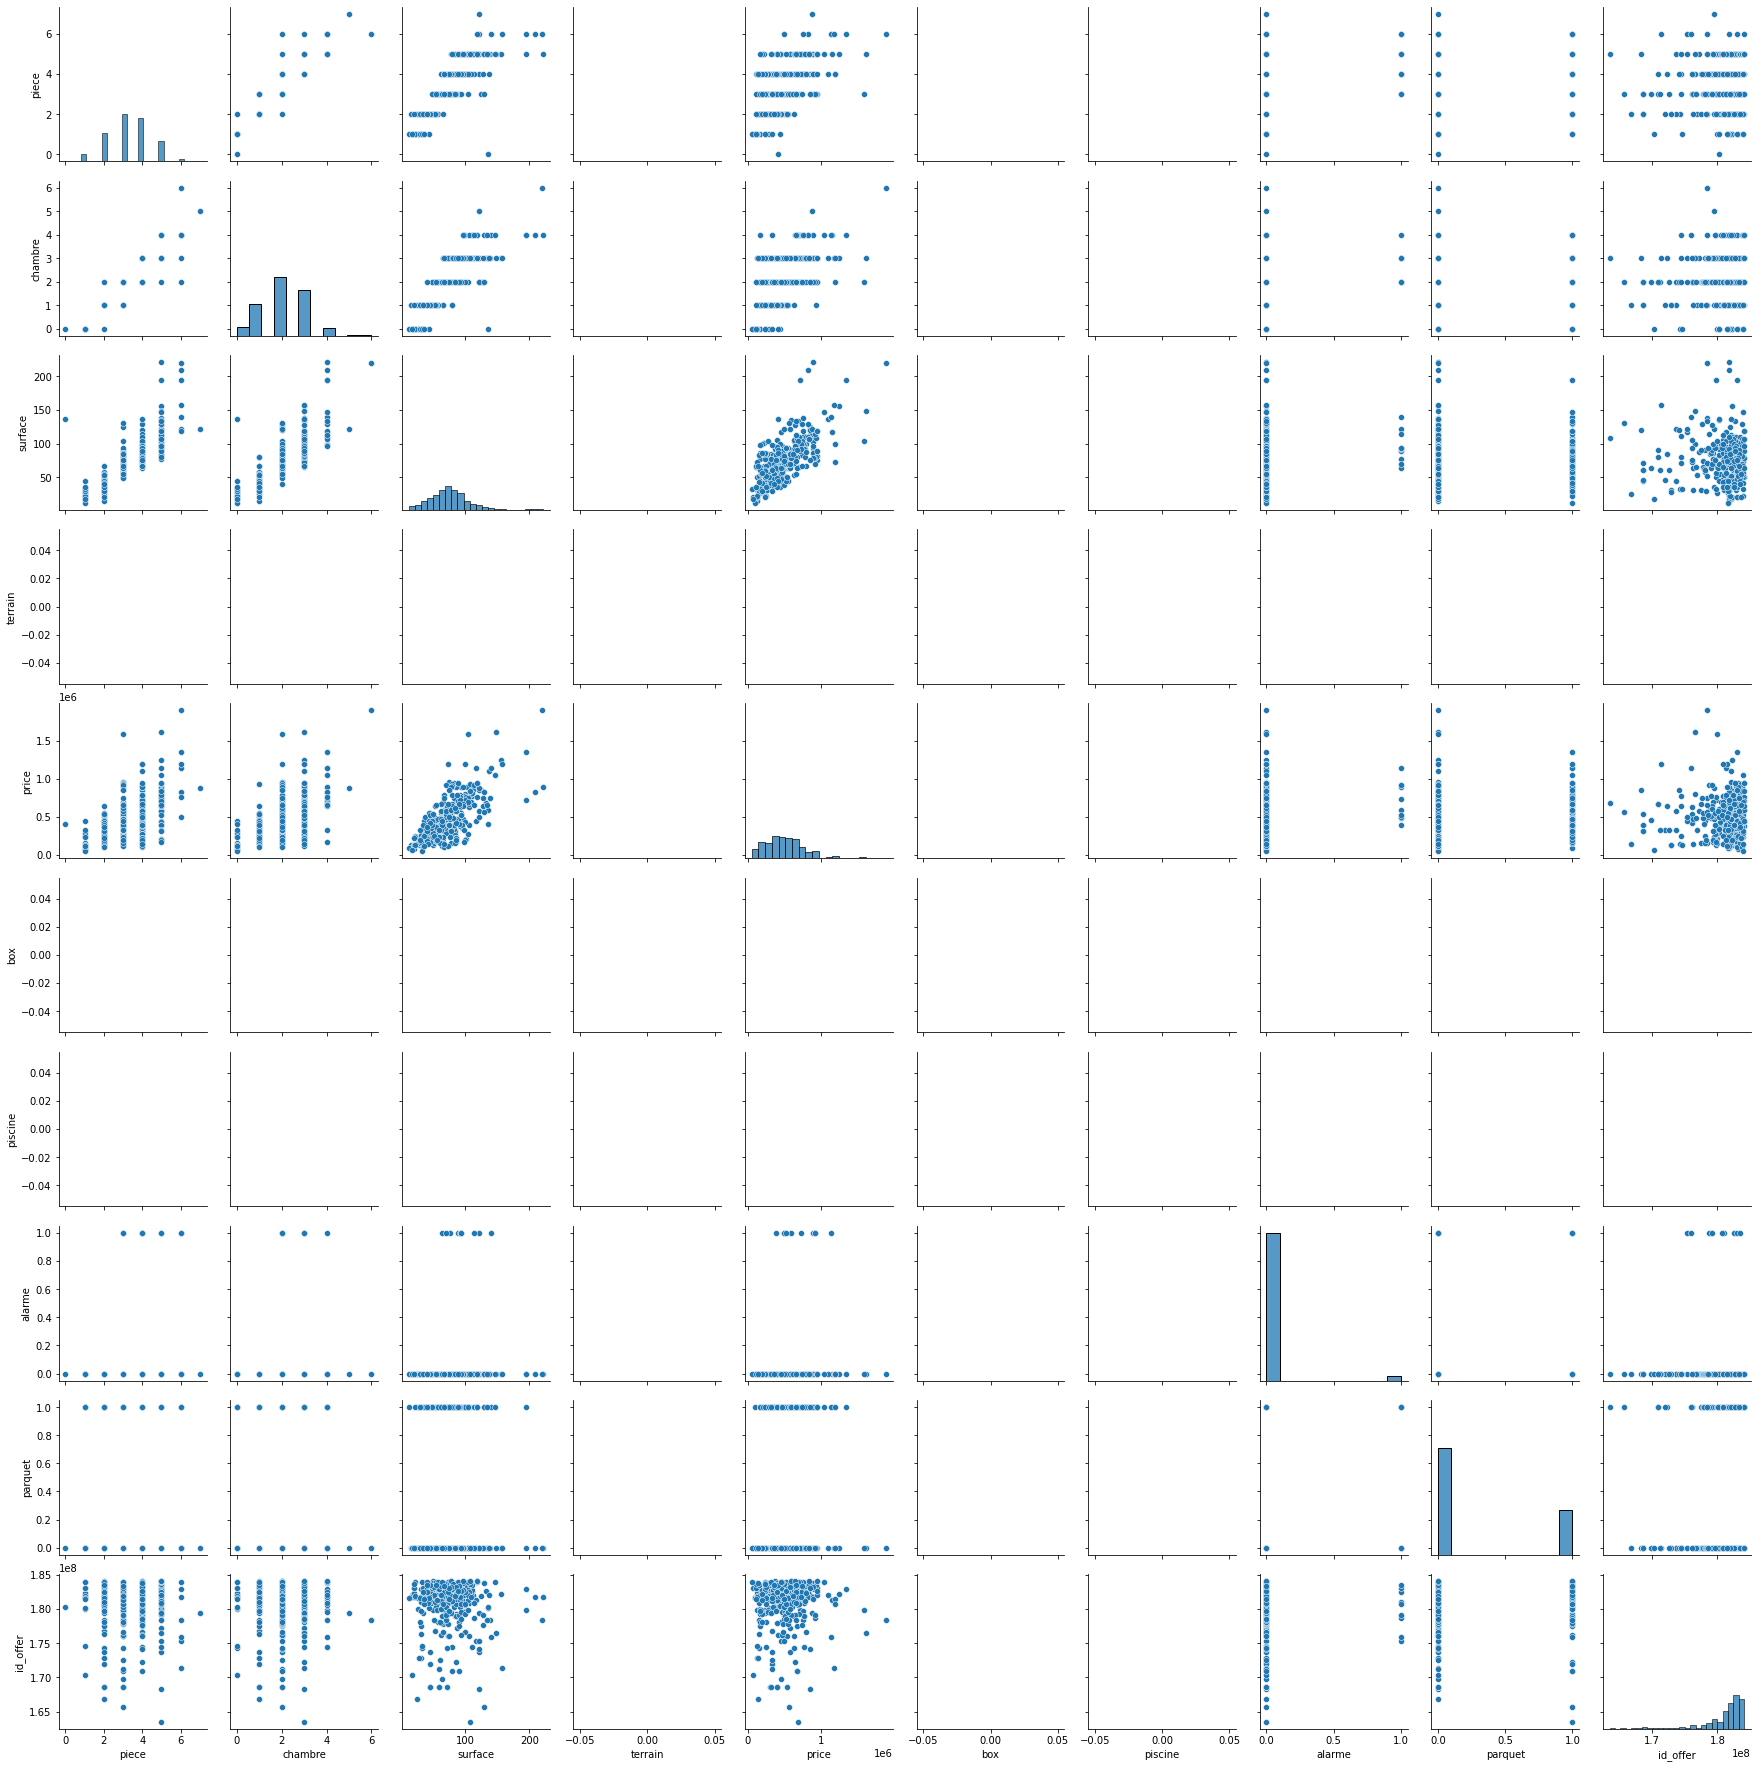

In [31]:
sns.pairplot(df)

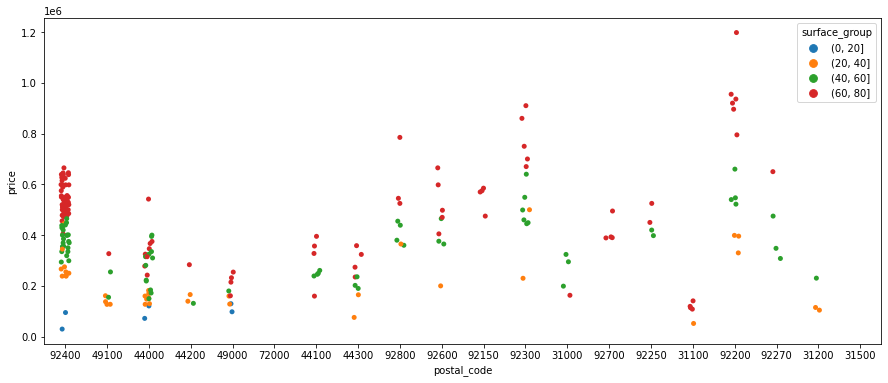

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.stripplot(x="postal_code", y="price", hue='surface_group', data=df, jitter=True, ax=ax);

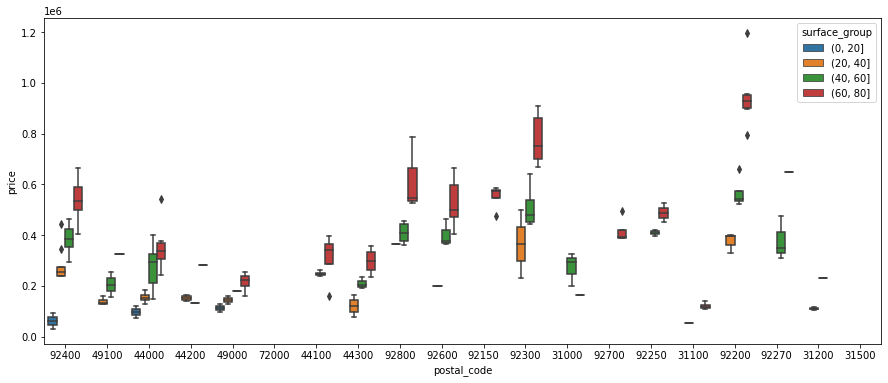

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="postal_code", y="price", hue='surface_group', data=df, ax=ax);

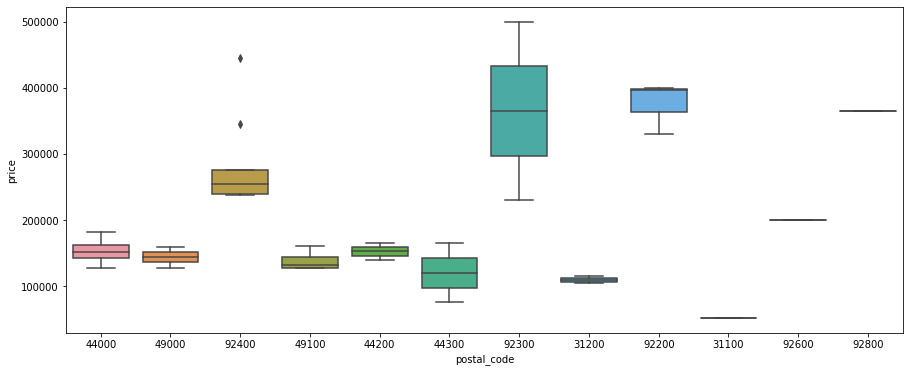

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="postal_code", y="price", data=df[df.surface_group == df.surface_group.cat.categories[1]], ax=ax);

In [22]:
pivot_table = df.pivot_table(index='postal_code', columns=['surface_group'], values='price')
pivot_table

surface_group,"(0, 20]","(20, 40]","(40, 60]","(60, 80]"
postal_code,,,,
31000,NaN,NaN,272663.333333,162990.000000
31100,NaN,52000.000000,NaN,120712.500000
31200,NaN,109750.000000,230500.000000,NaN
44000,96500.0,152537.500000,275702.500000,348875.000000
44100,NaN,NaN,248791.250000,309937.500000
44200,NaN,152687.000000,131250.000000,283500.000000
44300,NaN,120405.000000,209300.000000,297782.500000
49000,113850.0,144150.000000,180000.000000,215575.000000
49100,NaN,138450.000000,205075.000000,327000.000000


<AxesSubplot:xlabel='surface_group', ylabel='postal_code'>

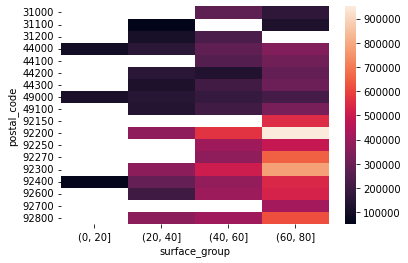

In [23]:
sns.heatmap(pivot_table)

In [24]:
geo_df = pd.DataFrame({'id': [i for i in range(0, 6)], 
                       'prix': pivot_table[30].values})
geo_df.head()

ValueError: All arrays must be of the same length

In [25]:
m = folium.Map(location=[48.87, 2.35], zoom_start=12)
m.choropleth(
    geo_data='communes-ile-de-france.geojson',
    key_on='features.properties.code',
    data=geo_df,
    columns=['id', 'prix'],
    fill_color='OrRd', 
    threshold_scale=[0, 900, 1100, 1300, 1500, 1700],
    highlight=True)
m

NameError: name 'geo_df' is not defined

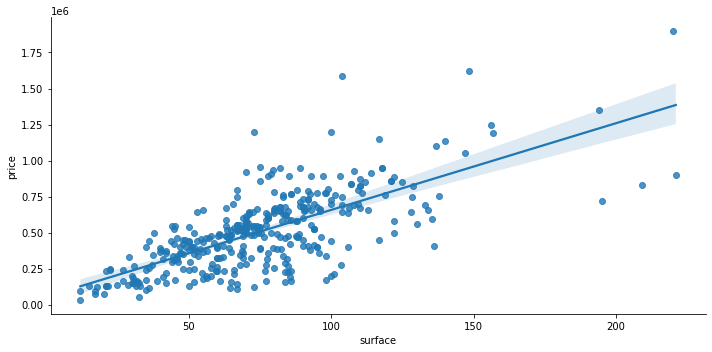

In [24]:
sns.lmplot(x='surface', y='price', data=df, aspect=2)

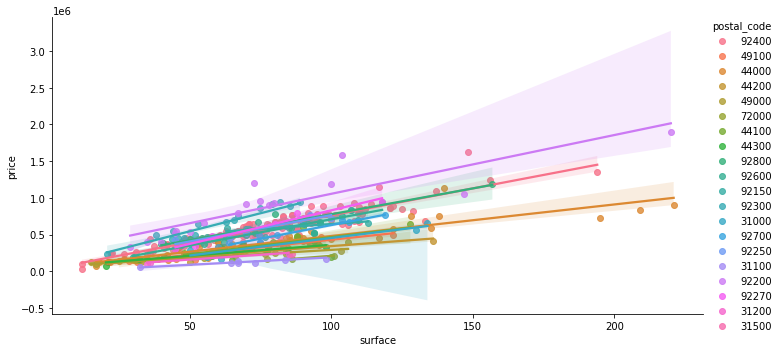

In [25]:
sns.lmplot(x='surface', y='price', hue='postal_code', data=df, aspect=2)

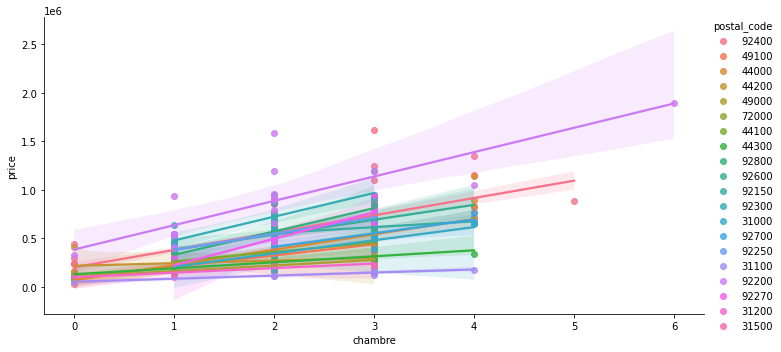

In [26]:
sns.lmplot(x='chambre', y='price', hue='postal_code', data=df, aspect=2)